Epoch 1/10
6/6 [==============================] - 3s 6ms/step - loss: 0.1790
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0287
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0310
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 9/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 10/10
2/2 [==============================] - 1s 6ms/step


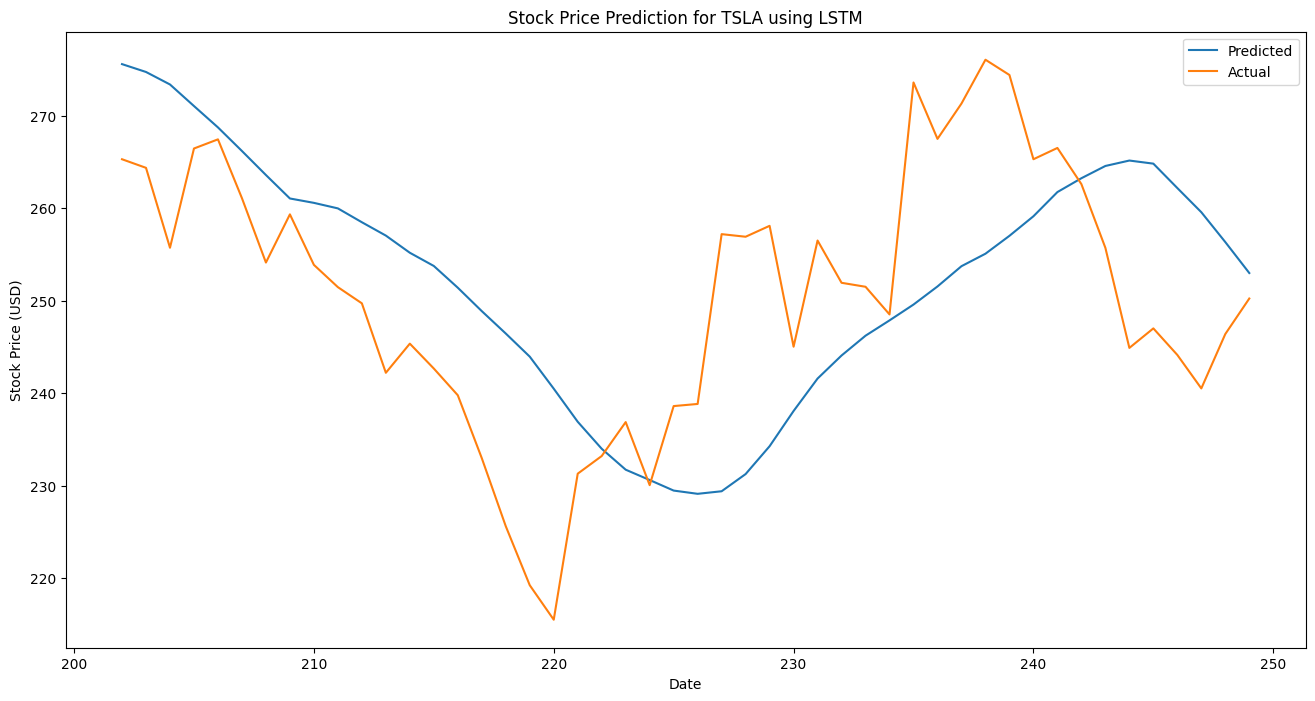

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the TSLA.csv dataset
df = pd.read_csv('TSLA.csv')

# Use the 'Close' prices as the target variable
data = df[['Close']].values.astype(float)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Function to create sequences and labels for LSTM model
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define sequence length and split data
sequence_length = 10
X, y = create_sequences(data_normalized, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(predictions_inv):], predictions_inv, label='Predicted')
plt.plot(df.index[-len(predictions_inv):], y_test_inv, label='Actual')
plt.title('Stock Price Prediction for TSLA using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


Epoch 1/10
6/6 [==============================] - 3s 6ms/step - loss: 0.1848
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0450
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0298
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 9/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0098
Epoch 10/10
2/2 [==============================] - 1s 7ms/step


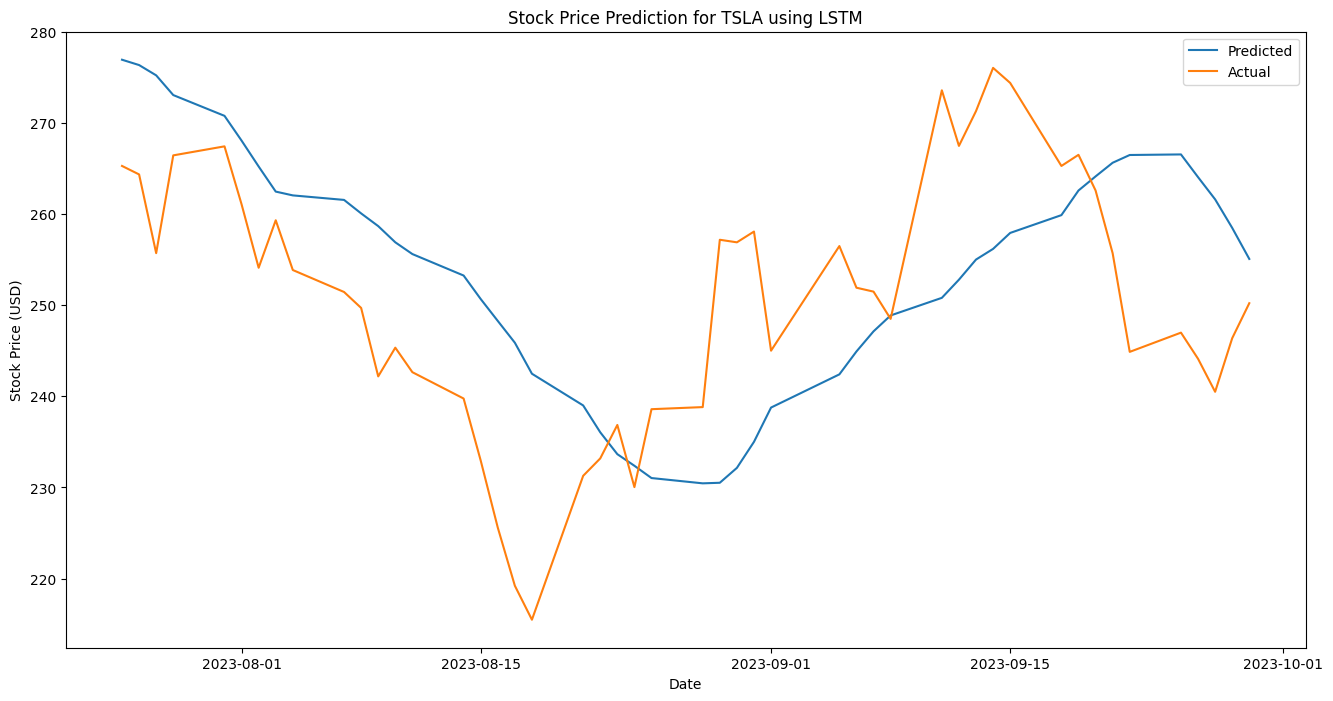

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the TSLA.csv dataset
df = pd.read_csv('TSLA.csv')

# Use the 'Close' prices as the target variable
data = df[['Date', 'Close']].copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Function to create sequences and labels for LSTM model
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define sequence length and split data
sequence_length = 10
X, y = create_sequences(data_normalized, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(data.index[-len(y_test_inv):], predictions_inv, label='Predicted')
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.title('Stock Price Prediction for TSLA using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
